In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('GLT_ByMajorCity.csv')


In [5]:
# Display info about the dataset
print("\nDataset shape:", df.shape)
print("Unique cities:", df['City'].nunique())
print("Unique countries:", df['Country'].nunique())
print("Missing values:\n", df.isnull().sum())



Dataset shape: (239177, 7)
Unique cities: 100
Unique countries: 49
Missing values:
 dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64


In [6]:
# Drop rows with missing values
df.dropna(inplace=True)
print("\nNew dataset shape:", df.shape)



New dataset shape: (228175, 7)


/var/folders/2w/njds6fr12r9dlvp34dksry0w0000gn/T/ipykernel_15316/1540598971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['RollingAvg'] = df_ny['AverageTemperature'].rolling(window=12).mean()


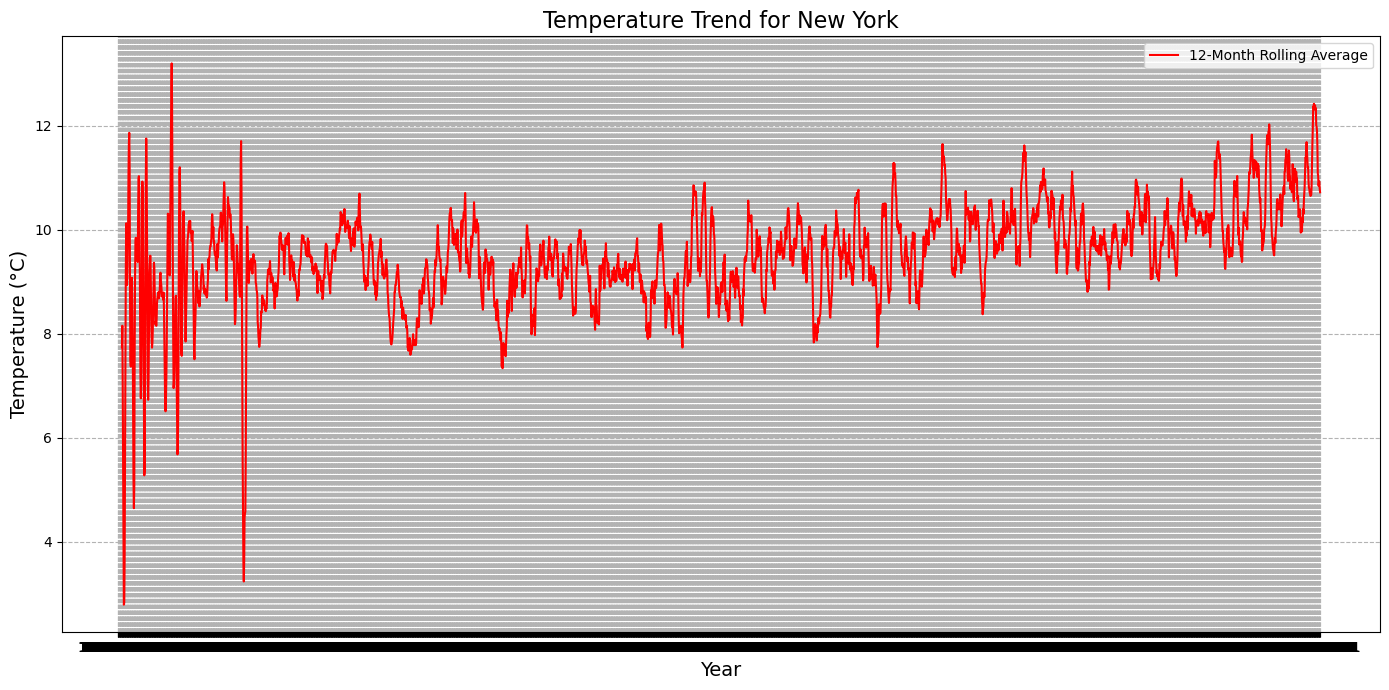

In [8]:
# Filter the dataset for New York
df_ny = df[df['City'] == 'New York']

# Smoothing the data with 12-Month Rolling Average
df_ny['RollingAvg'] = df_ny['AverageTemperature'].rolling(window=12).mean()

# Plot the smoothed data for New York
plt.figure(figsize=(14, 7))
plt.plot(df_ny['dt'], df_ny['RollingAvg'], label='12-Month Rolling Average', color='red')
plt.title('Temperature Trend for New York', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()


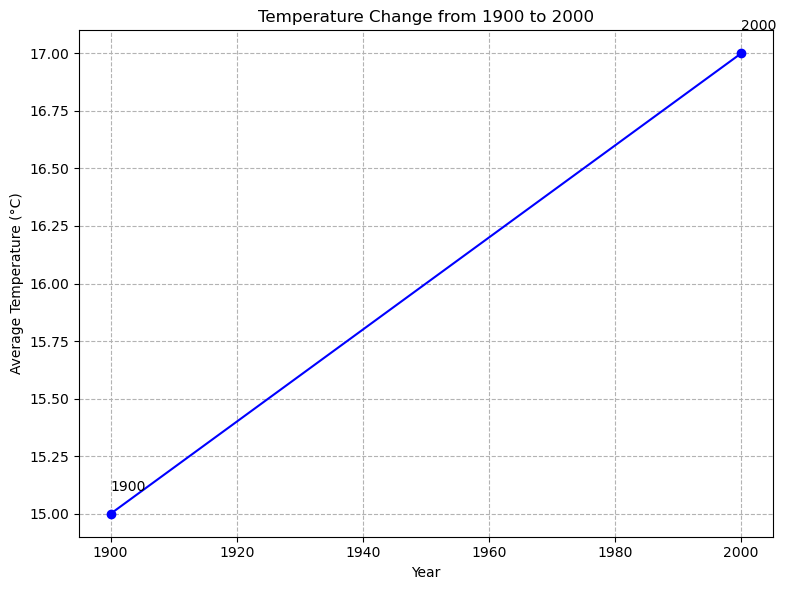

In [9]:
# Example data for Temperature Change from 1900 to 2000
years = [1900, 2000]
avg_temperatures = [15, 17]  # Average temperatures for 1900 and 2000

plt.figure(figsize=(8, 6))
plt.plot(years, avg_temperatures, marker='o', linestyle='-', color='blue')
for i, txt in enumerate(years):
    plt.annotate(txt, (years[i], avg_temperatures[i] + 0.1))
plt.title("Temperature Change from 1900 to 2000")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()


In [10]:
print(df.columns)


Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')


In [11]:
print(df.describe())


       AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000


In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


dt                               0.0
AverageTemperature               0.0
AverageTemperatureUncertainty    0.0
City                             0.0
Country                          0.0
Latitude                         0.0
Longitude                        0.0
dtype: float64


/Users/cihanelv/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


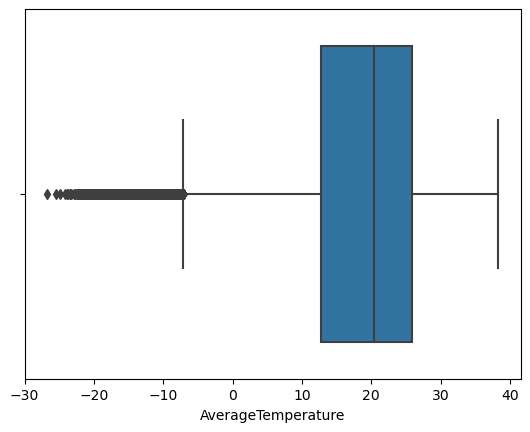

In [13]:
import seaborn as sns
sns.boxplot(x=df['AverageTemperature'])
plt.show()


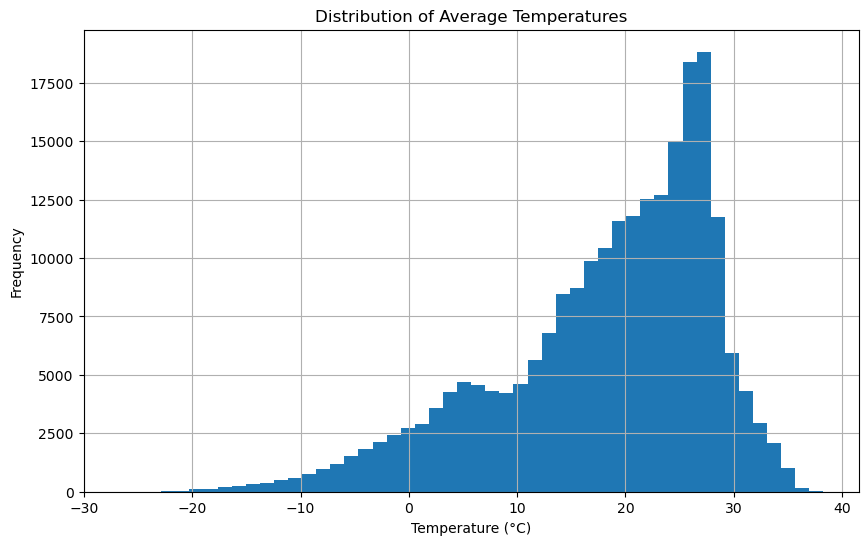

In [14]:
df['AverageTemperature'].hist(bins=50, figsize=(10,6))
plt.title("Distribution of Average Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


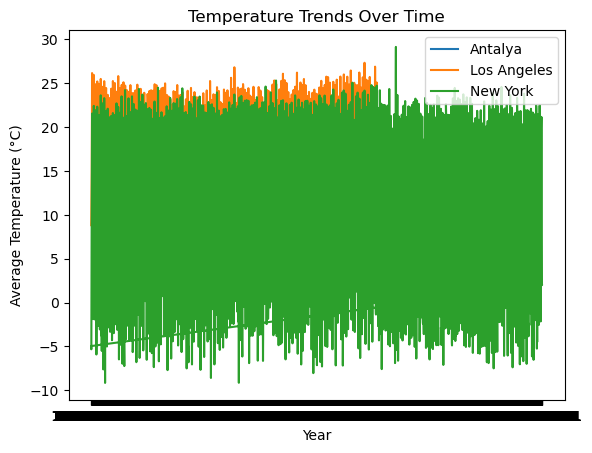

In [16]:
cities = ['Antalya', 'Los Angeles', 'New York']
for city in cities:
    city_data = df[df['City'] == city]
    plt.plot(city_data['dt'], city_data['AverageTemperature'], label=city)

plt.legend()
plt.title("Temperature Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show()
